In [8]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import re
from src.data_processing import get_recipe_df, drop_uncommon_ingreds
from src.recipe_annotation import Recipe, RecipeGroup
import matplotlib.pyplot as plt
from copy import copy

from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
%matplotlib inline

In [9]:
client = MongoClient()
db = client['recipes']
coll = db.eda_cookies

cookie_regx = re.compile("cookie", re.IGNORECASE)

df_cookies = drop_uncommon_ingreds(get_recipe_df(coll, cookie_regx), thresh = 20)

choc_chip_keys = df_cookies.index[df_cookies.label.str.contains("chocolate.chip.cookies", case=False, regex=True)]

choc_chip_group = RecipeGroup(df_cookies, choc_chip_keys)

In [10]:
choc_chip_group.get_dists(ratio=0.5)

In [11]:
dists_composite5050 = copy(choc_chip_group.dists)

In [12]:
tsne = TSNE(n_components=2, learning_rate=500, metric='precomputed')

In [13]:
trans_2d = tsne.fit_transform(choc_chip_group.dists)

In [14]:
trans_2d.shape

(2488, 2)

In [20]:
choc_chip_group.df.index.isin(choc_chip_group.member_keys).astype(int)

array([1, 1, 1, ..., 0, 0, 0])

In [92]:
group_mask = np.array(df_cookies.label.str.contains("chocolate.chip.cookies", case=False, regex=True)).astype(int)
colors = np.array(['r','b'])[group_mask]

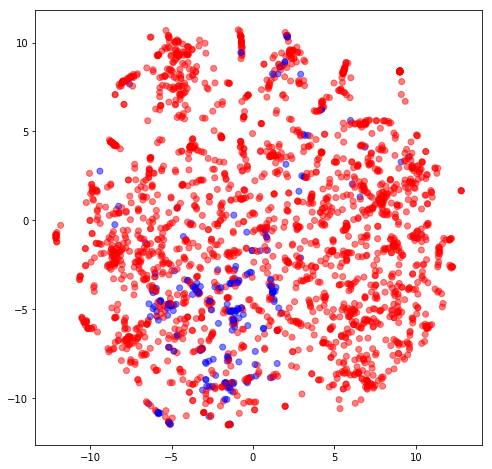

In [93]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(trans_2d[:,0], trans_2d[:,1], c=colors, alpha=0.5);

In [64]:
choc_chip_group.get_dists(ratio=1)
dists_cosine = copy(choc_chip_group.dists)

In [ ]:
cos_tsne_trns = tsne.fit_transform(dists_cosine)

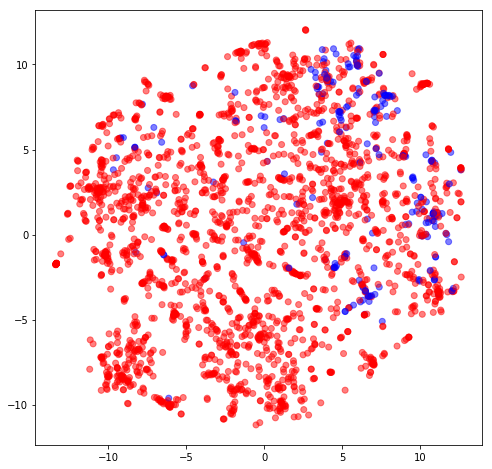

In [94]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(cos_tsne_trns[:,0], cos_tsne_trns[:,1], c=colors, alpha=0.5);

In [68]:
choc_chip_group.get_dists(ratio=0)
dists_jaccard = copy(choc_chip_group.dists)

In [ ]:
jac_tsne_trns = tsne.fit_transform(dists_cosine)

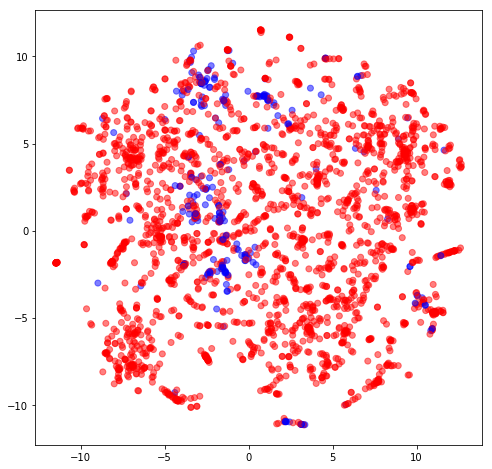

In [95]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(jac_tsne_trns[:,0], jac_tsne_trns[:,1], c=colors, alpha=0.5);

In [96]:
shortbread_mask = np.array(df_cookies.label.str.contains("shortbread|short.bread", case=False, regex=True)).astype(int)

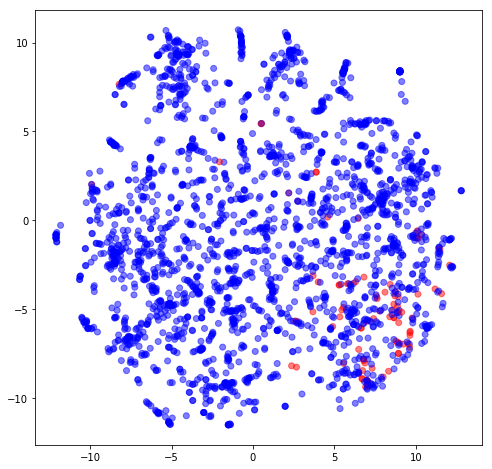

In [97]:
colors = np.array(['b','r'])[shortbread_mask]
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(trans_2d[:,0], trans_2d[:,1], c=colors, alpha=0.5);

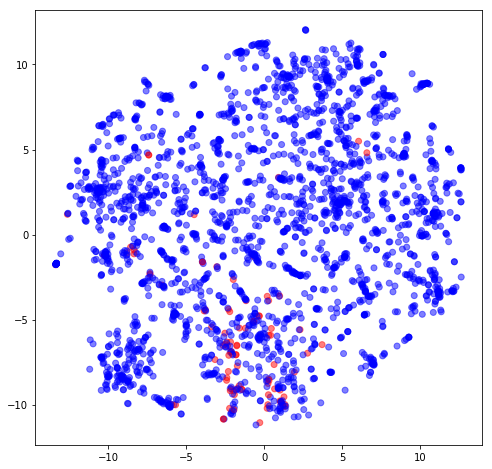

In [98]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(cos_tsne_trns[:,0], cos_tsne_trns[:,1], c=colors, alpha=0.5);

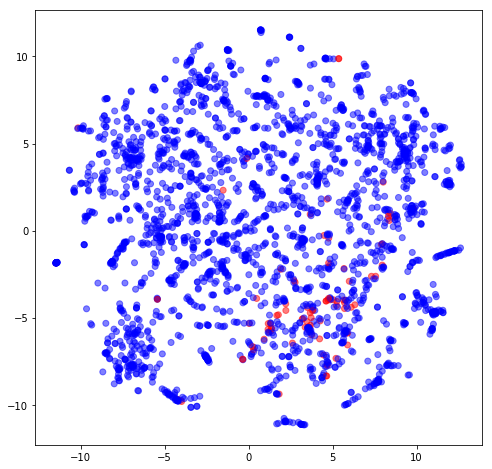

In [99]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(jac_tsne_trns[:,0], jac_tsne_trns[:,1], c=colors, alpha=0.5);

In [105]:
tsne_perp5 = TSNE(perplexity=5, metric='precomputed', learning_rate=100)
tsne_perp10 = TSNE(perplexity=10, metric='precomputed', learning_rate=100)
tsne_perp50 = TSNE(perplexity=50, metric='precomputed', learning_rate=100)
tsne_perp200 = TSNE(perplexity=200, metric='precomputed', learning_rate=100)

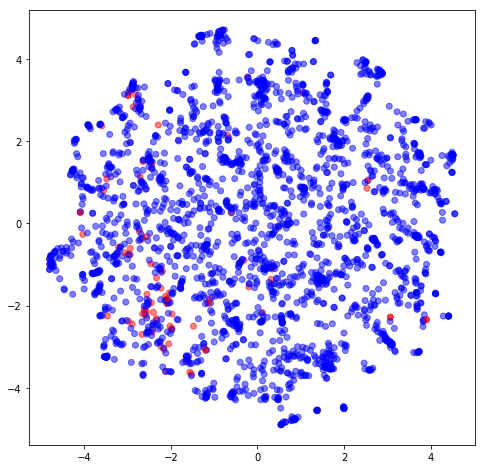

In [106]:
projection_perp5 = tsne_perp5.fit_transform(dists_composite5050)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(projection_perp5[:,0], projection_perp5[:,1], c=colors, alpha=0.5);

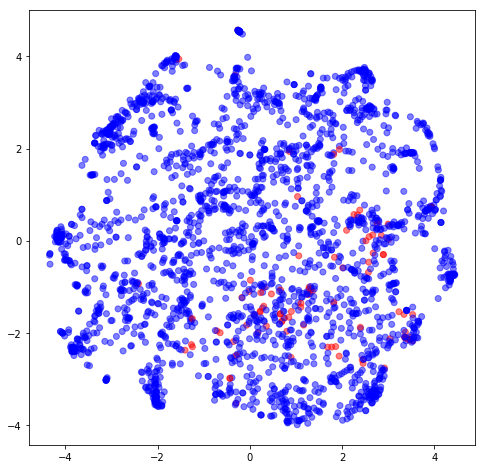

In [107]:
projection_perp10 = tsne_perp10.fit_transform(dists_composite5050)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(projection_perp10[:,0], projection_perp10[:,1], c=colors, alpha=0.5);

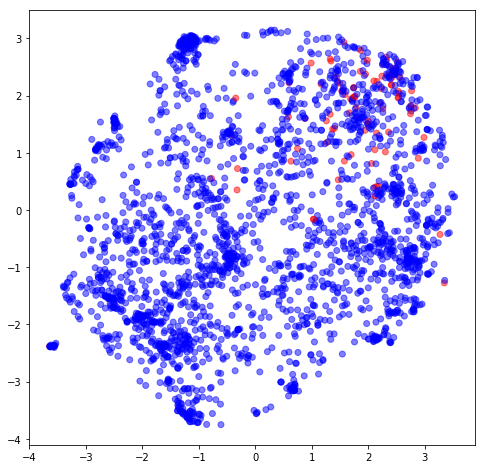

In [108]:
projection_perp50 = tsne_perp50.fit_transform(dists_composite5050)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(projection_perp50[:,0], projection_perp50[:,1], c=colors, alpha=0.5);

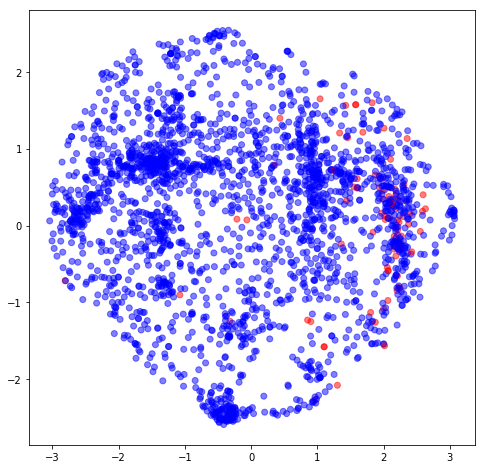

In [109]:
projection_perp200 = tsne_perp200.fit_transform(dists_composite5050)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(projection_perp200[:,0], projection_perp200[:,1], c=colors, alpha=0.5);